# Project 0 -- Basics of an Ideal Gas


`jupyter` notebooks allow you to interleave text, code, and results into one document. The origin of the name is Jupiter + python, with the inspiration coming from Galileo's notebooks showing the movement of the Galilean satellites of Jupiter. 

Each of these gray boxes is a cell. Cells can be *text* (like this one) or *code* (like the next one). This cell is a Markdown cell, which you'll see denoted along the top toolbar. You can set the type of each cell. Double click on this cell, and you can see how I formatted this text. Hold down <kbd>shift</kbd>+<kbd>enter</kbd> to run this cell and return it to the formatted text.

After you complete the notebook, to turn it in: 1) Kernel > Restart and run all (this will evaluate all cells in order, making sure you haven't written over any important definitions). 2) Make sure the Inputs are labeled consecutively starting from 1, and that your outputs still look right. 3) File > Download as > PDF via Latex.

Code cells have to be run in order to run the code contained within them. Click on the next cell and hold down <kbd>shift</kbd>+<kbd>enter</kbd> to run the cell.

For this week's project, I've started a notebook for you with some code sketches already filled in. Please make sure you can run the code snippets that are already here, and then expand on it to complete the rest of the project. Adapted from Zach Berta-Thompson.

After you complete the notebook, to turn it in: 1) Kernel > Restart and run all (this will evaluate all cells in order, making sure you haven't written over any important definitions). 2) Make sure the Inputs are labeled consecutively starting from 1, and that your outputs still look right. 3) File > Download as > PDF via Latex.

## Imports

Imports allow you to access packages of programs that others (or that you!) have created. Note that the hashtag symbol ``#`` indicates that a line is a comment, not code.

In [1]:
# gain access to numerical tools
import numpy as np

# gain access to plotting tools 
import matplotlib.pyplot as plt 

In [2]:
# these are some settings I like
# make plots show up in the notebook
%matplotlib inline
# set up bigger default plots
plt.matplotlib.rcParams['figure.figsize'] = (10,7)
plt.matplotlib.rcParams['font.size'] = 12

## Using units

Astropy is a package designed by and for astronomers. We'll use two modules from astropy, which we'll import directly. Here, we'll be using the astropy "units" module to keep track of units for us. This is extremely convenient because it allows us to convert between units, and keep track of our units, automatically. From personal experience, there can be huge problems if you get this wrong. As a warning, you do need to make sure you have the units you want before using the value somewhere that you aren't keeping track of units. 

In [3]:
# gain access to astropy units
from astropy import units, constants

In [4]:
myvelocity = 1e-5*constants.c  # use the speed of light stored in astropy.constants
print(myvelocity)
print(myvelocity.to('cm/s'))   # change the units to cm/s

mydistance = myvelocity*(5*units.min)
print(mydistance)# multiply by 5 min
# hmmm, units of "min/s" is kind of silly
# either of these simplifies the units for you
print(mydistance.decompose(), "or", mydistance.to('m')) 

2997.9245800000003 m / s
299792.45800000004 cm / s
14989.622900000002 m min / s
899377.3740000001 m or 899377.3740000001 m


## Q1: an array of random numbers

Create an array of random numbers for velocities and distances, using one of the options in np.random (e.g. a Gaussian, using "normal" or a Rayleigh distribution). I've included an example creating an array of random integers between 0 and 10, appending units on the end. Print out your array.

In [5]:
myvelocities = np.random.normal(0,10,size=50)*units.m/units.s
mydistances = np.random.normal(0,10,size=50)*units.m
print(myvelocities)

[ -3.89033762  -2.81991039   1.56323004   6.78647165  -2.39197728
  15.93678915  10.13541541   1.41979846 -11.89526664  -5.38825416
   6.58045877  -5.56986932 -12.77766426  13.18500607  -2.00622095
 -21.60541821   4.89563851 -13.97766808   7.98426926  -9.24208337
  -5.01714228   6.85686032   6.79395002   8.08133478   1.71726493
  -2.09230749  -0.8949057  -16.13404139  -7.36757876 -12.71536668
  -0.65473643 -20.75800795  12.41159598 -11.18417283 -16.78201374
 -10.85387094  14.03062749  18.99800391   2.8024933    0.81495085
  13.70091096  -5.14052479  16.02909912 -22.28941541 -10.86219202
 -13.06081322  -6.22218438  11.39247243  -5.79397687  -4.36254795] m / s


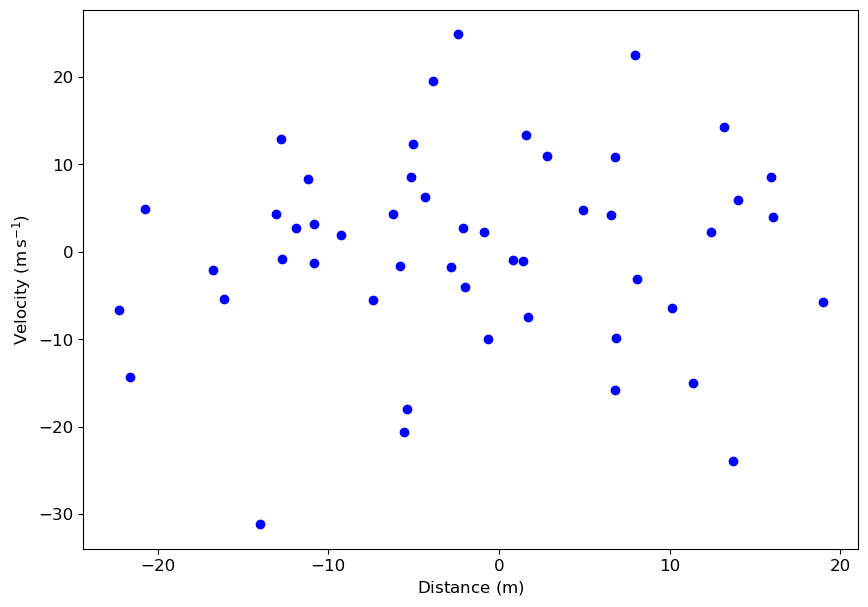

In [6]:
# plot the data
plt.scatter(myvelocities, mydistances, c='b');

# extract the units so you can use them in your axes labels
xunit_string = mydistances.unit.to_string('latex_inline')
yunit_string = myvelocities.decompose().unit.to_string('latex_inline')

# make the plot
plt.ylabel('Velocity ({})'.format(yunit_string))
plt.xlabel('Distance ({})'.format(xunit_string))
plt.show()

## Q2: An Ideal Gas

Earth's atmospheric pressure at sea level is $1.01 \times 10^5~Pa$ (where $1~Pa = 1~N/m^2 = 10^{-5}~bar$). At room temperature ($293 K$) and this pressure, how much volume would be filled by a little cloud of $10^6~ N_2$ molecules?

In [7]:
# For the sake of getting use to Python and jupyter notebooks,
# please use this code cell to perform your calculation.
# (Be sure to indicate the units associated with your answer).

N = int(1e6)                  # total number of molecules
pressure = 1.01e5*units.Pa    # in units of Pa
temperature = 293*units.K     # in units of K
k_B = constants.k_B           # Boltzmann's constant

# PV = NkT
volume = N * k_B * temperature / pressure

print(f'Volume: {volume.decompose()}')

Volume: 4.005249079207921e-20 m3


### Q3: Speeds in Gases 

Let's play around a little with these $10^6~N_2$ atoms, and the speeds at which they're moving. The Maxwell-Boltzmann distribution gives the probability for a particle in an ideal gas to have the $x$-component of its *velocity* fall between $v_x$ and $v_x + dv_x$ is written as 

$$ f(v_x)dv_x = \left(\frac{m}{2\pi k_B T}\right)^{1/2}\exp \left(\frac{-mv_x^2}{2 k_B T} \right)dv_x $$

where $m$ is the mass of the particle, $T$ is the temperature of the gas, and $k_B = 1.38 \times 10^{-23}~J~K^{-1}$ is Boltzmann's constant. If we define the quantity $\sigma = \sqrt{k_B T/m}$, then the above expression can be rewritten as 

$$ f(v_x)dv_x = \frac{1}{\sqrt{2\pi} \sigma}\exp \left(\frac{-v_x^2}{2 \sigma^2} \right)dv_x $$

which is precisely the equation for a Gaussian or "normal" probability distribution, centered at $v_x = 0$ and with a width of $\sigma$. 

Let's use Python to calculate $\sigma$ for simulate the $x$-component of the velocities for $10^6$ imaginary $N_2$ molecules, and then we'll create a `numpy` array that contains $10^6$ random numbers drawn from this probability distribution. 

In [8]:
# define our values
temperature = 293*units.K         # the temperature, in units of K
k_B = constants.k_B               # Boltzmann's constant, in units of J/K
mass = 28*units.Dalton            # the mass of an N2 molecule, in amu (or Daltons)

# calculate sigma from these (check on paper that the units make sense!)
sigma = np.sqrt( (k_B*temperature/mass).decompose() )   # in units of m/s

# draw a 1e5 random numbers from a Gaussian ("normal") distribution, 
# centered at vx=0 and with a width of sigma
# note these numpy functions can't use numbers with units
vx = np.random.normal(0,sigma.value,N)*sigma.unit #strip sigma of its units, but make sure vx keeps the right units

Now, let's see how frequently particular values of $v_x$ occur, by plotting a histogram. We will use `plt.hist` (https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) to make the histogram. Then, plot your histogram and add axis labels (e.g. https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html). I made the choice to use the `density=True` option in `plt.hist` means this distribution will be plotted as a probability density (which is a function that integrates to 1).

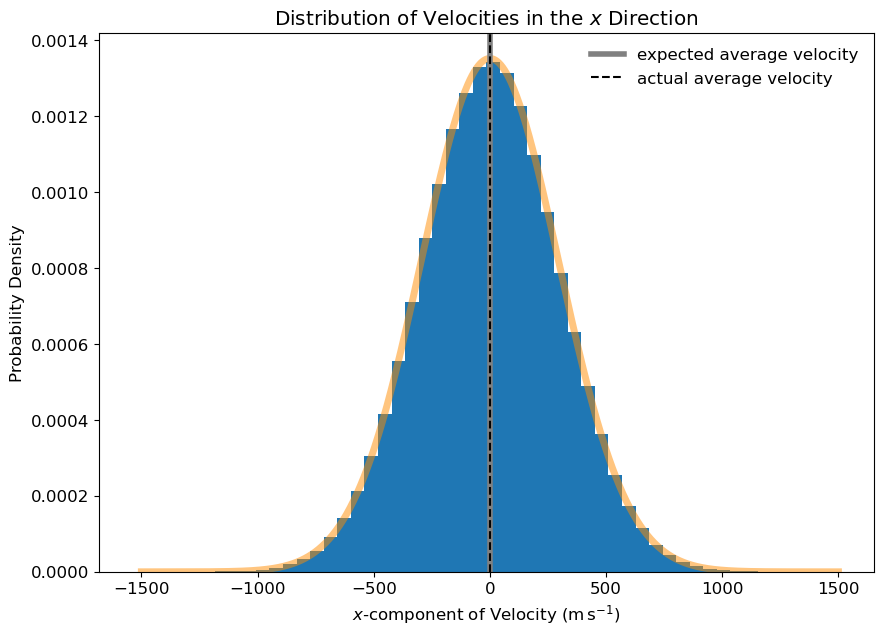

In [9]:
# let's plot a histogram of those values
plt.hist(vx.value, bins=50, density=True)

# always be sure to label your axes
# I know the units are super cumbersome but I promise it will save you at some time in your career
xunit_string = vx.decompose().unit.to_string('latex_inline')
plt.xlabel('$x$-component of Velocity ({})'.format(yunit_string))
plt.ylabel('Probability Density')
plt.title('Distribution of Velocities in the $x$ Direction')


# now, let's overplot the analytic shape of the probability distribution
#  first, we create a fine grid of vx values
vx_axis = np.linspace(-1500, 1500, 1000)*units.m/units.s
#  then, we use the above equation to calculate the probability
probability = 1/np.sqrt(2*np.pi)/sigma*np.exp(-vx_axis**2/2/sigma**2)
#  finally, we plot these x and y values as an orange line
plt.plot(vx_axis, probability, linewidth=5, color='darkorange', alpha=0.5)

# we can plot the expected average value for vx
plt.axvline(0, color='gray', lw=4, label='expected average velocity')

# we can plot the actual average value of vx, measured from our simulation
vx_average = np.mean(vx.value)
plt.axvline(vx_average, linestyle='--', color='black', label='actual average velocity')

# add a legend, including the labels that were assigned to each line
plt.legend(frameon=False)
plt.show();

Hey, cool! The histogram of random numbers that we created with Python follows the shape of the distribution we draw them from. Maybe that's not so surprising, but it's a useful test! Now, let's expand this to three dimensions of motion, and calculate a few more quantities.



+ Create two more arrays for $v_y$ and $v_z$ in the same way you did for $v_x$, assuming the motion in the three directions is totally independent.


In [10]:
vy = np.random.normal(0,sigma.value,N)*sigma.unit
vz = np.random.normal(0,sigma.value,N)*sigma.unit

+ Plot a histogram of $s = \sqrt{v^2}$, where $s$ indicates the speed of the particles (the magnitude of their 3D velocity vectors). 

+ Indicate with vertical lines on your plot the gravitational escape speed of the planet Earth (11.2 km/s) and the approximate escape speed of the comet 67P/Churyumov–Gerasimenko (1 m/s). 


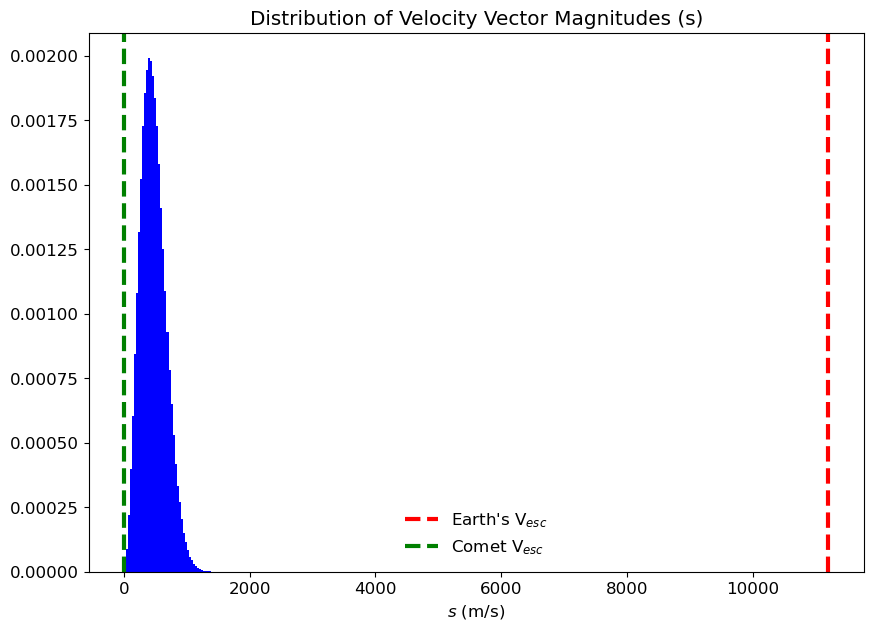

In [11]:
v = np.array([vx,vy,vz]).T # array of shape (1e6,3) -> 3D velocity vectors of each particle
s = np.linalg.norm(v,axis=1)

plt.hist(s, bins=50, density=True, color='b')
plt.xlabel('$s$ (m/s)')
plt.title('Distribution of Velocity Vector Magnitudes (s)')
plt.axvline(11.2e3, color='r', lw=3, linestyle='--', label=r"Earth's V$_{esc}$")
plt.axvline(1, color='green', lw=3, linestyle='--', label=r"Comet V$_{esc}$")
# plt.xscale('log')
plt.legend(frameon=False)
plt.show();

+ Briefly discuss the implications of the particle speeds and escape speeds for the long-term persistence of an atmosphere on these two bodies.

If this distribution describes the speeds of particles in the atmospheres of these two bodies (Earth and comet 67P/Churyumov–Gerasimenko), then paricles with speeds greater than the escape velocities will leave the atmosphere (evaporate). Based on this, the atmospheres of comets are much shorter-lived than those of Earth-like planets. 
